# Housing Prices - Advanced Regression Techniques

Filename: housing-model.ipynb \
Author: Timothy Holland \
Last updated: 27/05/2024 \
Kaggle competition: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

## 1. Data Loading & Analysis

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load training data
train_data = pd.read_csv('housing-prices-data/train.csv')
test_data = pd.read_csv('housing-prices-data/test.csv')

# Drop ID column from both
train_data = train_data.drop('Id', axis=1)
test_id = test_data['Id']
test_data = test_data.drop('Id', axis=1)

# Display first few rows
print(train_data.head())

# Summary of statistics
print(train_data.describe())

# Information in dataset
print(train_data.info())


   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     20850

In [36]:
# Display summary statistics for each feature
print(train_data.describe())

# Display the data types of each feature
print(train_data.info())

# Check for missing values in each feature
print(train_data.isnull().sum())

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ..

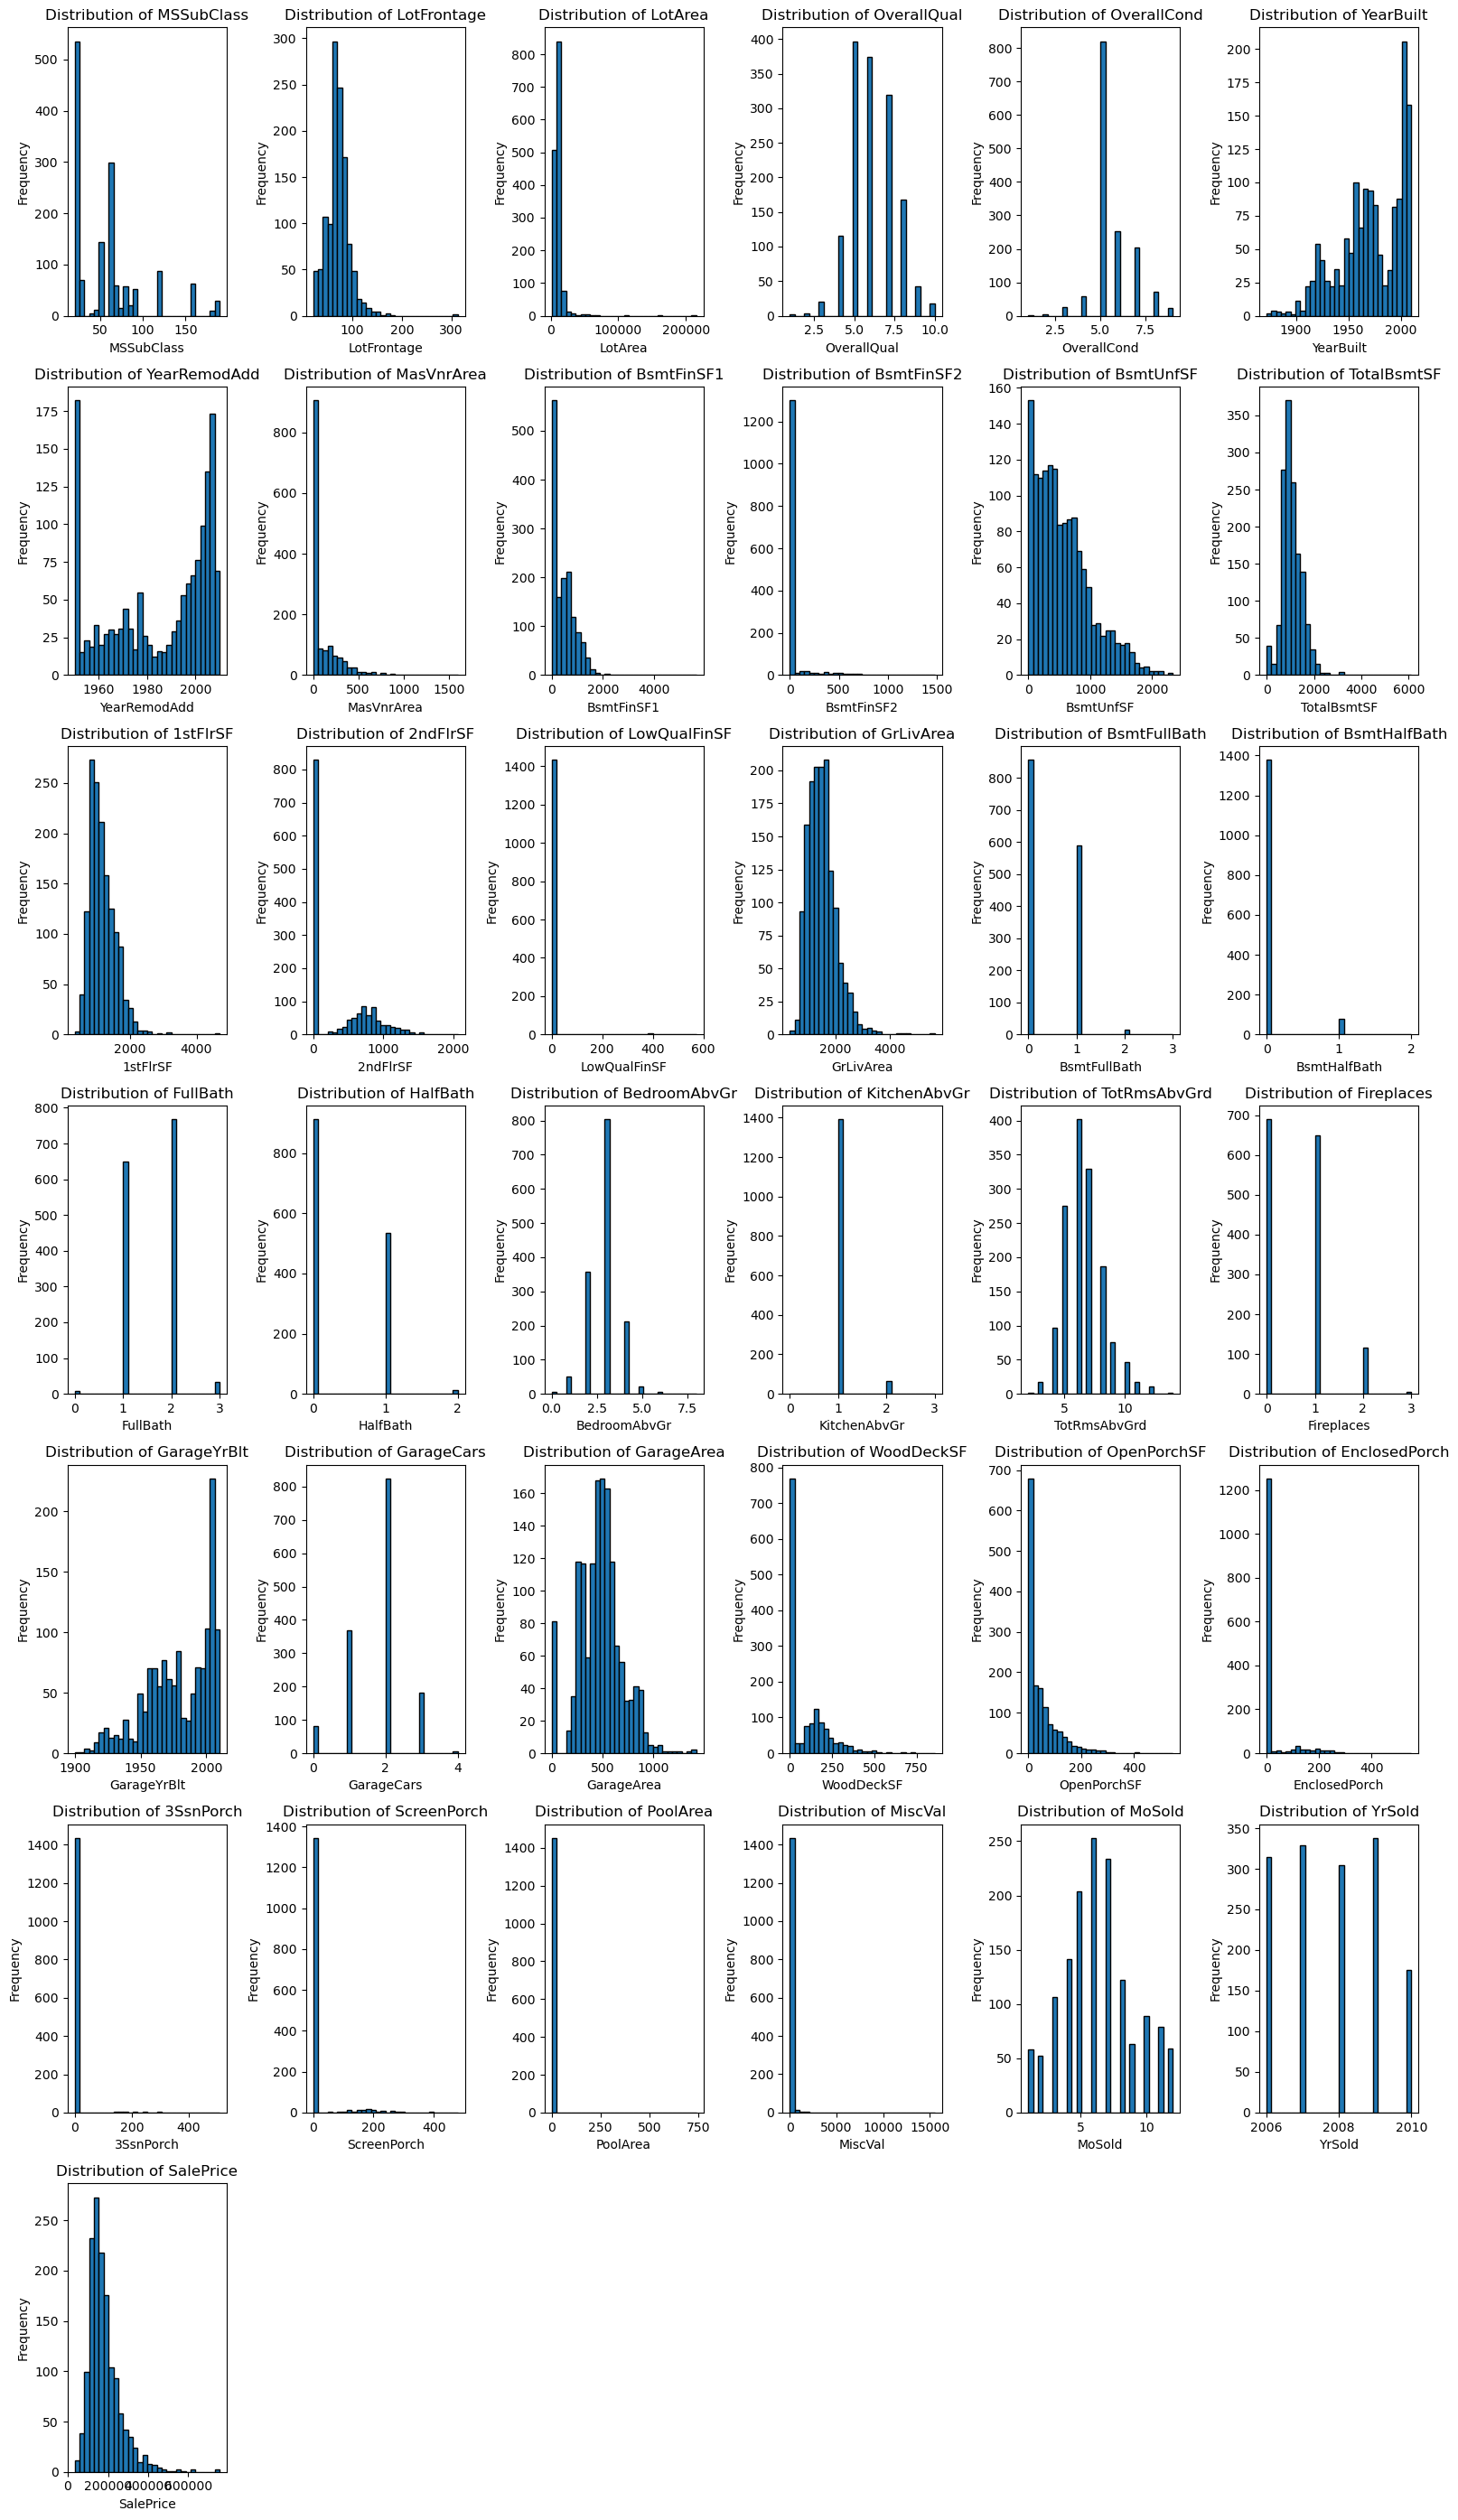

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify numeric features
numeric_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Create subplots for numeric features
num_features = len(numeric_features)
num_cols = 6
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(numeric_features):
    ax = axes[i]
    ax.hist(train_data[column], bins=30, edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove any unused subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

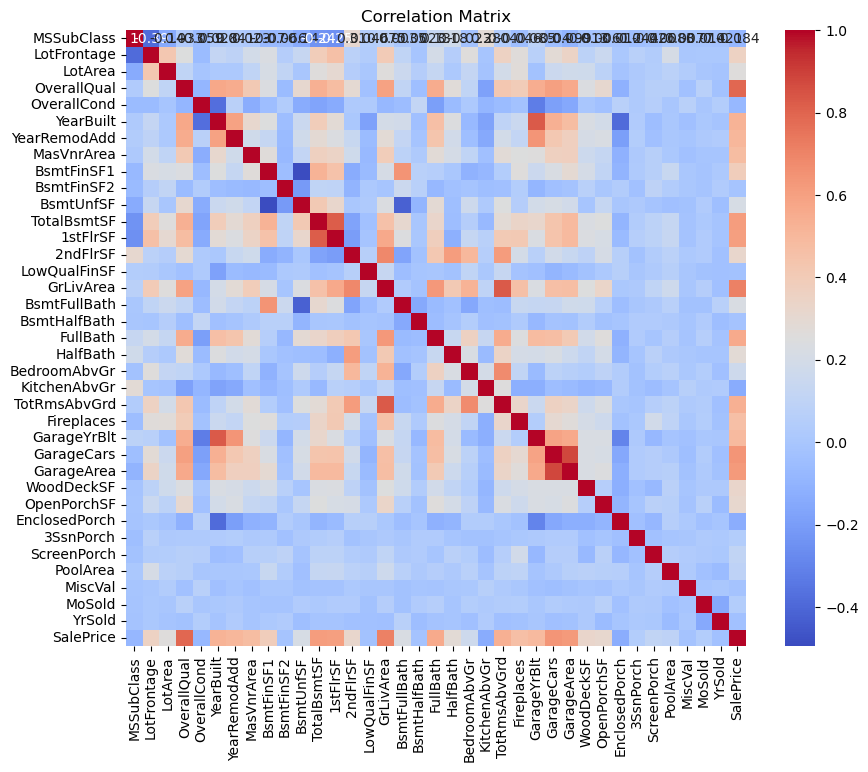

In [38]:
# Select only the numeric columns for correlation matrix
numeric_columns = train_data.select_dtypes(include=[float, int]).columns
numeric_data = train_data[numeric_columns]

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 2. Data Preprocessing

In [66]:
# Split data
y = train_data['SalePrice']
X = train_data.drop('SalePrice', axis=1)

Features with missing values:
LotFrontage: 17.74%
Alley: 93.77%
MasVnrType: 59.73%
MasVnrArea: 0.55%
BsmtQual: 2.53%
BsmtCond: 2.53%
BsmtExposure: 2.60%
BsmtFinType1: 2.53%
BsmtFinType2: 2.60%
Electrical: 0.07%
FireplaceQu: 47.26%
GarageType: 5.55%
GarageYrBlt: 5.55%
GarageFinish: 5.55%
GarageQual: 5.55%
GarageCond: 5.55%
PoolQC: 99.52%
Fence: 80.75%
MiscFeature: 96.30%


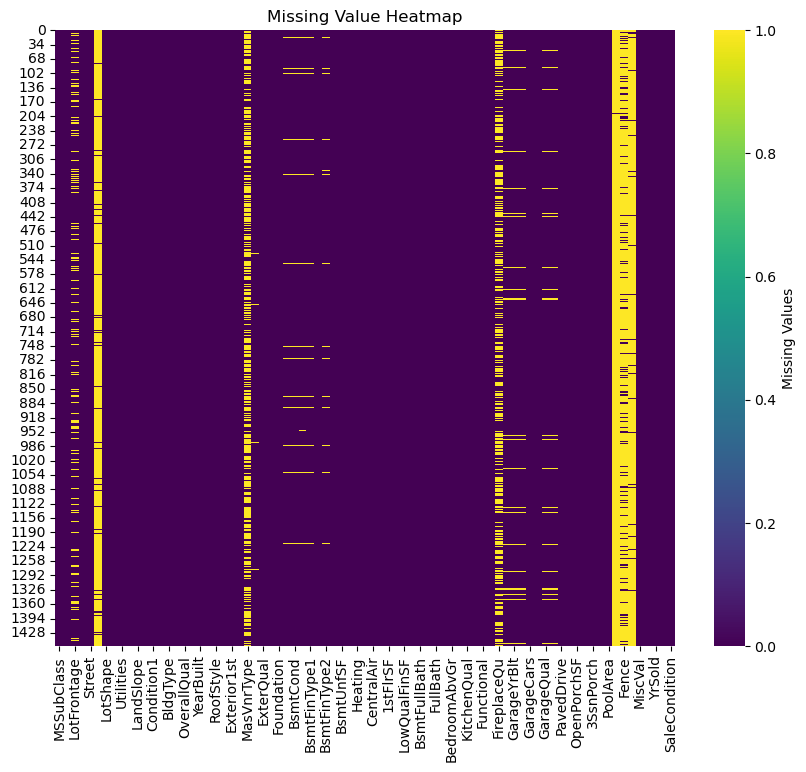

KeyError: 'feature_name'

In [70]:
# Handle Missing Values

import pandas as pd

# Assuming your dataset is stored in a pandas DataFrame called 'X'

# Calculate the number of missing values in each feature
missing_values = X.isnull().sum()

# Calculate the total number of values in each feature
total_values = X.shape[0]

# Calculate the proportion of missing values in each feature
missing_proportions = missing_values / total_values

# Filter the features with missing values
features_with_missing = missing_proportions[missing_proportions > 0]

# Print the features with missing values and their proportions
print("Features with missing values:")
for feature, proportion in features_with_missing.items():
    print(f"{feature}: {proportion:.2%}")
    

# Assuming your dataset is stored in a pandas DataFrame called 'X'

# Create a heatmap to visualize the correlation between missing values across features
plt.figure(figsize=(10, 8))
sns.heatmap(X.isnull(), cmap='viridis', cbar_kws={'label': 'Missing Values'})
plt.title('Missing Value Heatmap')
plt.show()

# Compare the distribution of observed values for a feature between cases with and without missing values
feature = 'feature_name'  # Replace with the feature you want to analyze
observed_values = X[feature].dropna()
missing_values = X[feature].isnull()

plt.figure(figsize=(8, 6))
sns.histplot(observed_values, kde=True, label='Observed Values')
sns.histplot(X[missing_values][feature], kde=True, label='Missing Values')
plt.title(f'Distribution of {feature}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [65]:
# Handle feature relevance

import pandas as pd
from sklearn.feature_selection import f_regression, mutual_info_regression

def select_relevant_features(X, y, threshold=0.01):
    # Select only numeric features
    numeric_features = X.select_dtypes(include=[np.number]).columns
    X_numeric = X[numeric_features]
    
    # Perform F-test for regression on numeric features
    f_test, _ = f_regression(X_numeric, y)
    
    # Perform mutual information for regression on numeric features
    mi = mutual_info_regression(X_numeric, y)
    
    # Create a DataFrame to store feature scores
    feature_scores = pd.DataFrame({
        'Feature': numeric_features,
        'F-test': f_test,
        'Mutual Information': mi
    })
    
    # Identify relevant features based on the threshold
    relevant_features = feature_scores[
        (feature_scores['F-test'] > threshold) |
        (feature_scores['Mutual Information'] > threshold)
    ]
    
    return relevant_features

# Example usage
# Assuming X is your feature matrix and y is your target variable
relevant_features = select_relevant_features(X, y, threshold=0.01)
print("Relevant features:")
print(relevant_features)

ValueError: Input X contains NaN.

### Sample Pipeline

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y = train_data['SalePrice']
X = train_data.drop('SalePrice', axis=1)
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the feature selection and model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('random_forest', RandomForestRegressor(random_state=42))
])

# Define the parameter grid for hyperparameter search
param_grid = {
    'feature_selection__k': [100, 150, 200],
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 25, 50, 70],
    'random_forest__min_samples_split': [2, 5, 10, 15]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(pipeline, param_grid, cv=5, n_iter=10, scoring='neg_mean_squared_error', random_state=42)

# Fit the RandomizedSearchCV object
random_search.fit(X, y)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = -random_search.best_score_
best_model = random_search.best_estimator_
print("Best parameters:", best_params)
print("Best RMSE:", np.sqrt(best_score))

Best parameters: {'random_forest__n_estimators': 100, 'random_forest__min_samples_split': 2, 'random_forest__max_depth': None, 'feature_selection__k': 200}
Best RMSE: 29921.665628674276


## Predictions

In [58]:
# Fit the pipeline on the entire training data
# pipeline.fit(X, y)

# Make predictions on the test set
test_predictions = best_model.predict(test_data)

# Create a DataFrame with the test IDs and predicted SalePrice
submission_df = pd.DataFrame({'Id': test_id, 'SalePrice': test_predictions})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)